## Multiple Linear Regression

In [1]:
# y = b0*x1 + b2*x2 + b3*x3 +..............=> multilinear regression
# y = sales
# x1 =TV
# x2 =radio
# x3 =newpaper

# y = b0 + b1*x1 => simple linear regression

In [2]:
import numpy as np # linear algebra
import pandas as pd # data manupalation
import matplotlib.pyplot as plt  # visulazation tool
import seaborn as sns # visulazation tool
import scipy.stats as stats # statistical tool
plt.rcParams["figure.figsize"] = (10, 6)

import warnings
warnings.filterwarnings("ignore")

## Read Dataset

In [3]:
df = pd.read_csv("Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## Data Preparation EDA

In [4]:
df.shape

(200, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.isnull()

,TV,radio,newspaper,sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [8]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [9]:
!pip install missingno

You should consider upgrading via the '/Users/mustafatatis/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [10]:
import missingno as msno

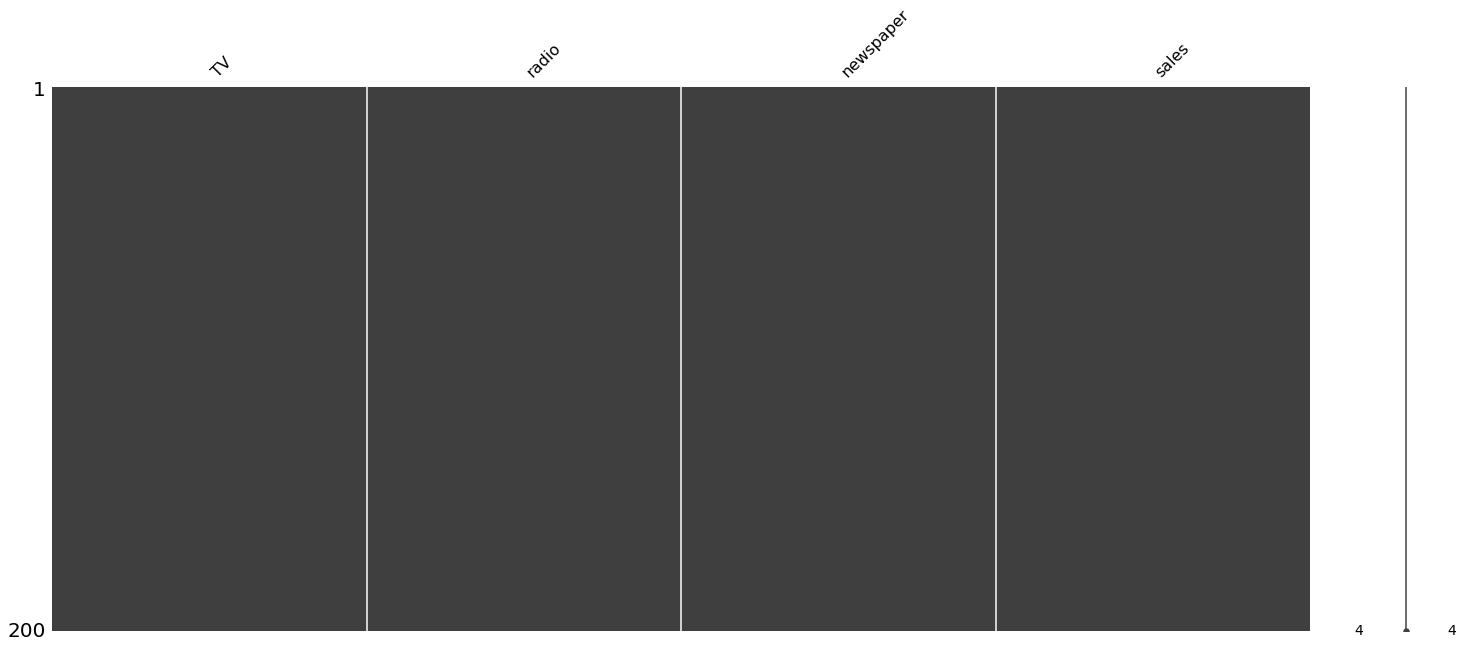

In [11]:
msno.matrix(df)
plt.show()

In [12]:
df.sort_values(by = "sales", ascending= False)

,TV,radio,newspaper,sales
175,276.9,48.9,41.8,27.0
183,287.6,43.0,71.8,26.2
198,283.6,42.0,66.2,25.5
98,289.7,42.3,51.2,25.4
147,243.2,49.0,44.3,25.4
...,...,...,...,...
108,13.1,0.4,25.6,5.3
78,5.4,29.9,9.4,5.3
8,8.6,2.1,1.0,4.8
155,4.1,11.6,5.7,3.2


In [14]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [13]:
from scipy.stats import skew

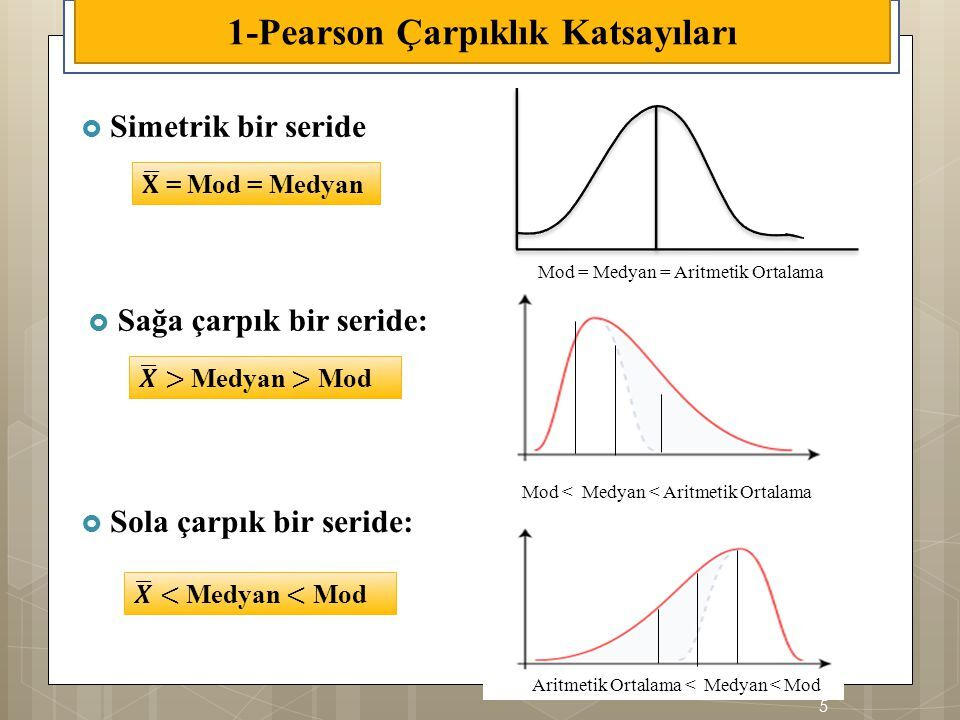

In [16]:
for i in df.drop(columns = "sales").columns:
    print(i, skew(df[i]))

TV -0.06932836662244649
radio 0.0934668451108453
newspaper 0.8879959753085498


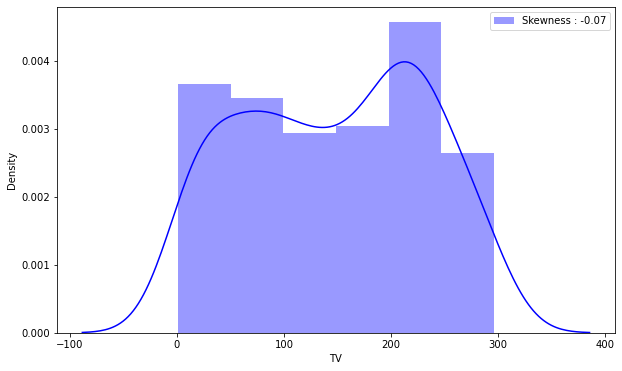

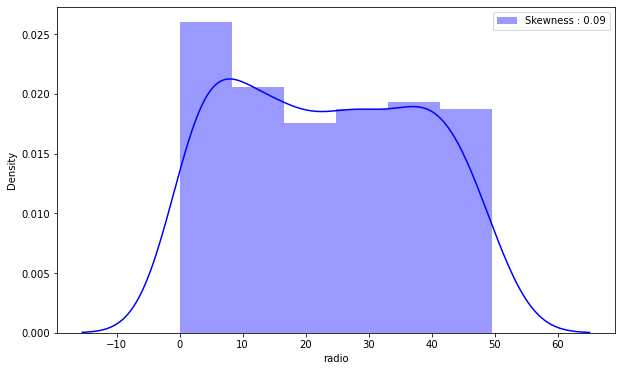

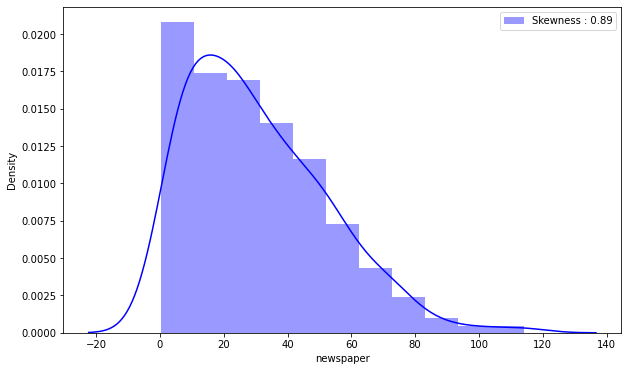

In [17]:
for j in df.drop(columns = "sales").columns:
    g = sns.distplot(df[j], color= "b", label= "Skewness : %.2f"%(df[j].skew()))
    g = g.legend(loc= "best")
    plt.show()

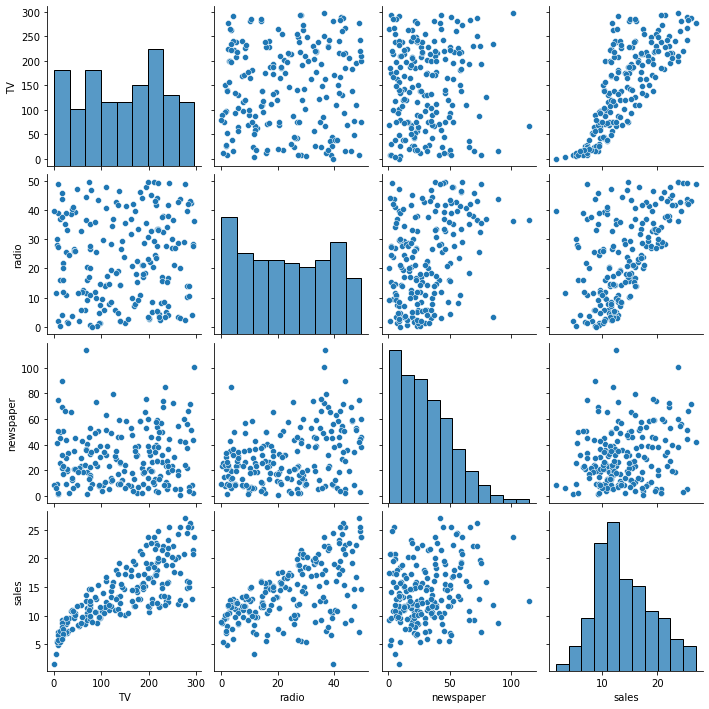

In [18]:
sns.pairplot(df)
plt.show()

In [19]:
# Tv- sales : pozitif güçlü
# Radio-sales: orta
# Newspaper -sales : zayıf

## Train - Test Split

In [20]:
!pip install scikit-learn

You should consider upgrading via the '/Users/mustafatatis/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [21]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=bdf9fa425e8e9068387e3f80f154b0958e8ee2208753814fc42dc7dae500f366
  Stored in directory: /Users/mustafatatis/Library/Caches/pip/wheels/e4/7b/98/b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn
You should consider upgrading via the '/Users/mustafatatis/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [22]:
X = df.drop(columns = "sales")

y = df["sales"]

print(X,y)

        TV  radio  newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns] 0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
## 100 - 1000 =>  train : 70 - 80 / test : 20 - 30
## 1000 - 100000 => train : 80 - 90 / test : 10 - 20
## 100000 - 1000000 => train : 90 - 95 / test : 5 - 10
## + 1000000 => train : 99 / test : 1

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 42)

# test_size = 0.3 ile datamın yüzde 30'unun test verisi olarak ayırdım.

# random_state=42 ile 42'yi kullandığım her defasında aynı train ve test datasını alacak. 
# mesela aynı datada çalışırken takım arkadaşlarınızla skorlarınızı karşılaştırabilmeniz için bunu aynı rakam girmelisin. 
# ki anlamlı bir karşılaştırma yapabilesiniz.

In [27]:
df.sample(5)

,TV,radio,newspaper,sales
81,239.8,4.1,36.9,12.3
32,97.2,1.5,30.0,9.6
91,28.6,1.5,33.0,7.3
148,38.0,40.3,11.9,10.9
99,135.2,41.7,45.9,17.2


In [28]:
print("X Train Features Shape: {}\nY Train Features Shape: {}\nX Test Features Shape: {}\nX Train Features Shape: {}".format(
            X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X Train Features Shape: (140, 3)
Y Train Features Shape: (140,)
X Test Features Shape: (60, 3)
X Train Features Shape: (60,)


In [29]:
X_train

,TV,radio,newspaper
169,284.3,10.6,6.4
97,184.9,21.0,22.0
31,112.9,17.4,38.6
12,23.8,35.1,65.9
35,290.7,4.1,8.5
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [30]:
y_train

169    15.0
97     15.5
31     11.9
12      9.2
35     12.8
       ... 
106     7.2
14     19.0
92     19.4
179    12.6
102    14.8
Name: sales, Length: 140, dtype: float64

In [31]:
X_test

,TV,radio,newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2
115,75.1,35.0,52.7
69,216.8,43.9,27.2
170,50.0,11.6,18.4
174,222.4,3.4,13.1
45,175.1,22.5,31.5


In [32]:
y_test

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    11.5
45     14.9
66      9.5
182     8.7
165    11.9
78      5.3
186    10.3
177    11.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65      9.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      10.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
79     11.0
197    12.8
38     10.1
24      9.7
122    11.6
195     7.6
29     10.5
19     14.6
143    10.4
86     12.0
114    14.6
173    11.7
5       7.2
126     6.6
117     9.4
73     11.0
140    10.9
98     25.4
172     7.6
96     11.7
Name: sales, dtype: float64

## Model Fitting and Compare Actual and Predicted Labels

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
model = LinearRegression()

In [35]:
model.fit(X_train, y_train)

LinearRegression()

In [36]:
model.intercept_  #intercept => b0 otonom paramaetre

2.7089490925159065

In [39]:
model.coef_ # slope=> b1 , b2 ,b3 => independent variables coefficient 

array([0.04405928, 0.1992875 , 0.00688245])

In [40]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### y = 2.71 +0.04*+0.20*Radio +0.007* Newspaper

In [41]:
y_pred = model.predict(X_test)        #  y_pred   /    y_head
y_pred

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [42]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test - y_pred}

In [43]:
comparing = pd.DataFrame(my_dict)
comparing

,Actual,pred,residual
95,16.9,16.565396,0.334604
15,22.4,21.188228,1.211772
30,21.4,21.551071,-0.151071
158,7.3,10.889238,-3.589238
128,24.7,22.202320,2.497680
115,12.6,13.355569,-0.755569
69,22.3,21.196925,1.103075
170,8.4,7.350285,1.049715
174,11.5,13.275471,-1.775471
45,14.9,15.124495,-0.224495


In [44]:
result_sample = comparing.head(25)
result_sample

,Actual,pred,residual
95,16.9,16.565396,0.334604
15,22.4,21.188228,1.211772
30,21.4,21.551071,-0.151071
158,7.3,10.889238,-3.589238
128,24.7,22.202320,2.497680
115,12.6,13.355569,-0.755569
69,22.3,21.196925,1.103075
170,8.4,7.350285,1.049715
174,11.5,13.275471,-1.775471
45,14.9,15.124495,-0.224495


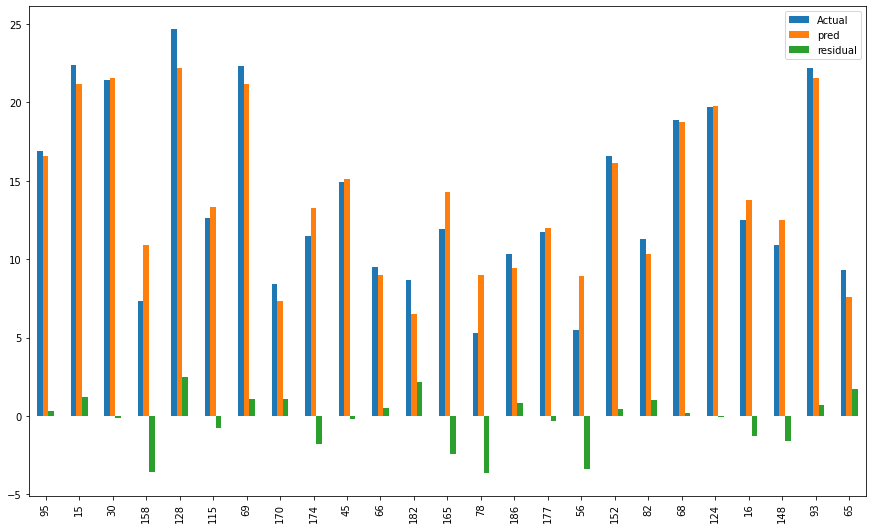

In [49]:
result_sample.plot(kind = "bar", figsize = (15, 9))
plt.show()

## Error Metrics

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

https://veribilimcisi.com/2017/07/14/mse-rmse-mae-mape-metrikleri-nedir/

In [51]:
R2_score = r2_score(y_test, y_pred)

R2_score

0.8609466508230368

In [52]:
mae = mean_absolute_error(y_test, y_pred)

mae

1.5116692224549089

In [53]:
mse = mean_squared_error(y_test, y_pred)

mse

3.796797236715219

In [54]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

rmse

1.9485372043446385

In [55]:
sales_mean = df["sales"].mean()
sales_mean

14.022500000000003

In [56]:
df["sales"].std()

5.217456565710477

In [57]:
df["sales"].var()

27.221853015075364

In [58]:
mae / sales_mean

0.10780311802138767

In [59]:
rmse / sales_mean

0.13895790367941793

## What is the concept of punishment for RSME error metric?

In [60]:
variables = {"Actual": [1000, 2000, 3000], "pred": [1100, 2200, 3200]}

variables2 = {"Actual": [1000, 2000, 3000], "pred": [1100, 2200, 3600]} ## RMSE'nin hataları nasıl cezalandırdığını görmek için pred'in son değerini 3600 yaptım.

In [61]:
variables, variables2

({'Actual': [1000, 2000, 3000], 'pred': [1100, 2200, 3200]},
 {'Actual': [1000, 2000, 3000], 'pred': [1100, 2200, 3600]})

In [62]:
df_2 = pd.DataFrame(variables)
df_2

,Actual,pred
0,1000,1100
1,2000,2200
2,3000,3200


In [63]:
df_3 = pd.DataFrame(variables2)
df_3

,Actual,pred
0,1000,1100
1,2000,2200
2,3000,3600


In [64]:
df_2["residual"] = abs(df_2.Actual - df_2.pred)
df_2

,Actual,pred,residual
0,1000,1100,100
1,2000,2200,200
2,3000,3200,200


In [65]:
df_3["residual"] = abs(df_3.Actual - df_3.pred)

df_3

,Actual,pred,residual
0,1000,1100,100
1,2000,2200,200
2,3000,3600,600


In [66]:
df_2.residual.sum() / 3

166.66666666666666

In [67]:
df_3.residual.sum() / 3

300.0

In [68]:
((df_2.residual ** 2).sum() / 3) ** 0.5

173.20508075688772

In [69]:
((df_3.residual ** 2).sum() / 3) ** 0.5

369.68455021364724

## Evaluation Model

In [70]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance: ")
    print("---------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")                        #### onemli

In [71]:
eval_metric(y_test, y_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.8609466508230368
MAE 		: 1.5116692224549089
MSE 		: 3.796797236715219
RMSE 		: 1.9485372043446385


In [72]:
y_train_pred = model.predict(X_train)

In [73]:
eval_metric(y_train, y_train_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.9055159502227753
MAE 		: 1.1581502948072533
MSE 		: 2.4793551789057866
RMSE 		: 1.574596830590544


In [80]:
## train r2 > test r2 => overfitting : asiri ogrenme
## train r2 < test r2 => underfitting : eksik ogrenme

## Is data suitable for Linear Regression?

In [74]:
residuals = y_test - y_pred

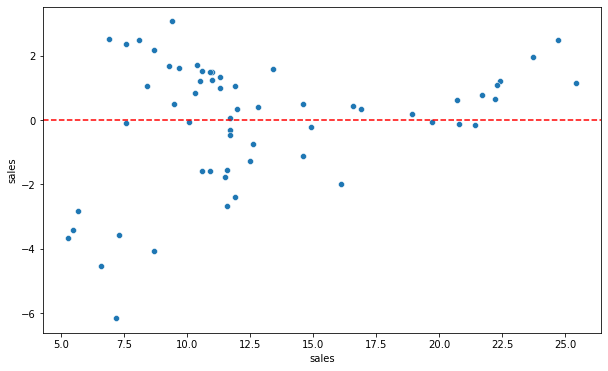

In [75]:
plt.figure(figsize= (10,6))
sns.scatterplot(x = y_test, y = residuals) # residuals
plt.axhline(y= 0, color = "r", linestyle = "--")
plt.show()

In [76]:
# Benim residual değerlerim kırmızı çizginin etrafında ne kadar simetrik veya normal dağılmışsa 
# yani linearity ne kadar fazla ise veri linear modele o kadar uygundur

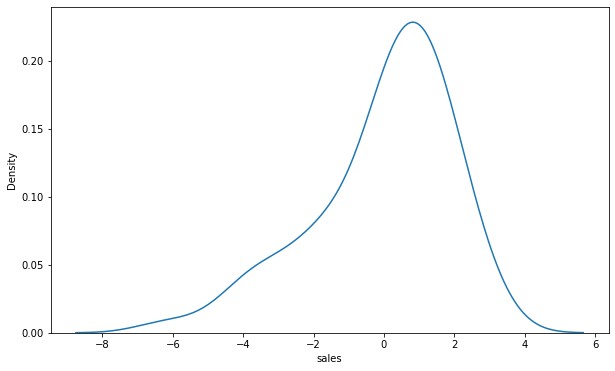

In [77]:
sns.kdeplot(residuals)
plt.show()

In [78]:
skew(residuals)

-0.9865673346742723

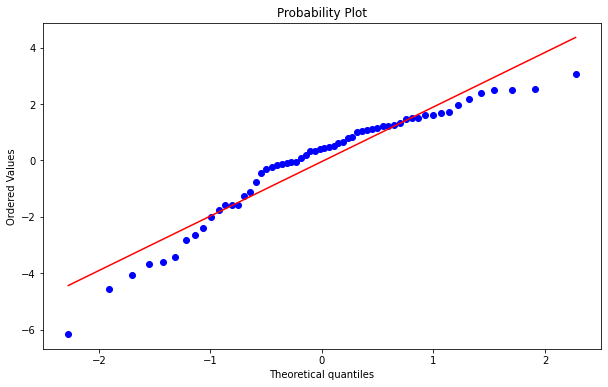

In [79]:
stats.probplot(residuals, dist= "norm", plot= plt);